In [ ]:
import re
import pandas as pd
import numpy as np


# Remove non-alphabetic characters (Data Cleaning)
def clean_text(column):

    for row in column:
        row = re.sub('([A-Z][a-z]+)', r' \1', re.sub('([A-Z]+)', r' \1',  str(row))).split()
        row = ' '.join(row)
        row = re.sub("(\\t)", " ", str(row)).lower()
        row = re.sub("(\\r)", " ", str(row)).lower()
        row = re.sub("(\\n)", " ", str(row)).lower()

    

        # Remove the characters - <>()|&©ø"',;?~*!
        row = re.sub(r"[<>()|&©ø\[\]\'\",.\}`$\{;@?~*!+=_\//1234567890]", " ", str(row)).lower()
        row = re.sub(r"\\b(\\w+)(?:\\W+\\1\\b)+", "", str(row)).lower()


#         # Replace INC nums to INC_NUM
#         row = re.sub("([iI][nN][cC]\d+)", "INC_NUM", str(row)).lower()

#         # Replace CM# and CHG# to CM_NUM
#         row = re.sub("([cC][mM]\d+)|([cC][hH][gG]\d+)", "CM_NUM", str(row)).lower()

        # Remove punctuations at the end of a word
        row = re.sub("(\.\s+)", " ", str(row)).lower()
        row = re.sub("(\-\s+)", " ", str(row)).lower()
        row = re.sub("(\:\s+)", " ", str(row)).lower()

        # Replace any url to only the domain name
        try:
            url = re.search(r"((https*:\/*)([^\/\s]+))(.[^\s]+)", str(row))
            repl_url = url.group(3)
            row = re.sub(r"((https*:\/*)([^\/\s]+))(.[^\s]+)", repl_url, str(row))
        except:
            pass
        #row = re.sub('([A-Z][a-z]+)', r' \1', re.sub('([A-Z]+)', r' \1',  str(row))).split()
        # Remove multiple spaces
        row = re.sub("(\s+)", " ", str(row)).lower()

        # Remove the single character hanging between any two spaces
        row = re.sub("(\s+.\s+)", " ", str(row)).lower()
        
        

        yield row

In [ ]:
df_code = pd.read_csv('javascript_train.csv')
df_code = df_code[:5000]

/home/srijoni/anaconda3/envs/sri_py/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,19,25,29,35,42,44,46,48,50,52,54,56,58,60,62,64,66,68,70,72,80,86,88,90,92,94,96,98,100,102,104,110,112,114,116,123,131) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_code_p = df_code[["code","docstring"]]
#df_code_p=df_code_p[:3]

In [ ]:
print (df_code_p["docstring"][0])

/*
Calculate the HMAC-MD5, of a key and some data


In [ ]:
processed_code= clean_text(df_code_p['code'])
processed_summary = clean_text(df_code_p['docstring'])

In [ ]:
import spacy
from time import time

nlp = spacy.load('en', disable=['ner', 'parser']) 

# Process text as batches and yield Doc objects in order
code = [str(doc) for doc in nlp.pipe(processed_code, batch_size=50)]
summary = [ str(doc)  for doc in nlp.pipe(processed_summary, batch_size=50)]

#summary = ['_START_ '+ str(doc) + ' _END_' for doc in nlp.pipe(processed_summary, batch_size=50)]

In [ ]:
#print (summary)

In [ ]:


df_code_p['code'] = code
df_code_p['docstring'] = summary
#print(df_code_p)

/home/srijoni/anaconda3/envs/sri_py/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/srijoni/anaconda3/envs/sri_py/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# import matplotlib.pyplot as plt

# text_count = []
# summary_count = []


# print(df_code_p['code'])
# for sent in df_code_p['code']:
#     print (sent)
#     text_count.append(len(sent.split()))
    
# for sent in df_code_p['docstring']:
#     summary_count.append(len(sent.split()))

# graph_df = pd.DataFrame() 

# graph_df['text'] = text_count
# graph_df['summary'] = summary_count

# graph_df.hist(bins = 10)
# plt.show()

In [ ]:
max_code_len = 100
max_summary_len =10


# Select the Summaries and Text which fall below max length 

import numpy as np

cleaned_code = np.array(df_code_p['code'])
cleaned_summary= np.array(df_code_p['docstring'])

short_text = []
short_summary = []

for i in range(len(cleaned_code)):
    if len(cleaned_summary[i].split()) <= max_summary_len and len(cleaned_code[i].split()) <= max_code_len:
        short_text.append(cleaned_code[i])
        short_summary.append(cleaned_summary[i])
        
post_code = pd.DataFrame({'code': short_text,'summary': short_summary})

post_code.head(100)

,code,summary
0,function key data var bkey str bin key if bkey...,calculate the hmac md of key and some data
1,function restore event listener implementation...,not public for now
2,function base client opts this opts opts var s...,a base implementation for all the clients
3,function style var list style split prop list ...,根据属性的拼写规则，做适当的调整
4,function index if this transition index return...,解析动画的规则
...,...,...
95,function var val this get val choices this res...,multi
96,function var minimum width left max width cont...,multi
97,function type source real var id id source ele...,cache event type handler link
98,function form var result reverse each form get...,split input file for multiple files


In [ ]:
post_code['summary'] = post_code['summary'].apply(lambda x: 'sostok ' + x \
        + ' eostok')

post_code.head(2)

,code,summary
0,function key data var bkey str bin key if bkey...,sostok calculate the hmac md of key and some ...
1,function restore event listener implementation...,sostok not public for now eostok


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_validation, y_train, y_validation = train_test_split(
    np.array(post_code["code"]),
    np.array(post_code["summary"]),
    test_size=0.15,
    random_state=0,
    shuffle=True,
)

In [ ]:
# Tokenize the text to get the vocab count 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Prepare a tokenizer on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_train))

threshold = 5

cnt_infrequent = 0
total_cnt = 0

for key, value in x_tokenizer.word_counts.items():
    total_cnt = total_cnt + 1
    if value < threshold:
        cnt_infrequent = cnt_infrequent + 1

    
print("% of not frequent words in vocabulary: ", (cnt_infrequent / total_cnt) * 100)

/home/srijoni/anaconda3/envs/sri_py/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/srijoni/anaconda3/envs/sri_py/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/srijoni/anaconda3/envs/sri_py/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/srijoni/anaconda3/envs/sri_py/lib/pyt

% of not frequent words in vocabulary:  59.82173465889613


In [ ]:
# Prepare a tokenizer, again -- by not considering the rare words
x_tokenizer = Tokenizer(num_words = total_cnt - cnt_infrequent) 
x_tokenizer.fit_on_texts(list(x_train))

# Convert text sequences to integer sequences 
x_train_seqs = x_tokenizer.texts_to_sequences(x_train) 
x_validation_seqs = x_tokenizer.texts_to_sequences(x_validation)
print (x_validation_seqs)
# Pad zero upto maximum length
x_train = pad_sequences(x_train_seqs,  maxlen=max_code_len, padding='post')
x_validation = pad_sequences(x_validation_seqs, maxlen=max_code_len, padding='post')

# Size of vocabulary (+1 for padding token)
x_voc = x_tokenizer.num_words + 1


print("Size of vocabulary in X = {}".format(x_voc))

[[2, 428, 222, 33, 577, 428, 4, 370, 33, 33, 33, 59, 878, 4, 915, 2, 347, 29, 33, 268, 5, 68, 347, 878, 222, 915], [2, 4, 34, 181, 1164, 15, 4, 50, 3, 50, 1164, 1164, 52, 29, 1164, 52, 19, 150, 1164, 65], [2, 74, 706, 106, 72, 4, 208, 38, 38, 259, 395, 214, 395, 106, 78, 3, 395, 208, 3, 259, 259, 17, 721, 72, 313, 72, 255, 17, 3, 395, 259, 208, 395, 395, 5, 123, 706, 706], [2, 361, 74, 361, 5, 361, 361, 88, 24, 74, 8, 361, 51, 6, 74, 70], [2, 344, 49, 22, 41, 39, 4, 344, 344, 19, 1, 109, 25, 19, 1, 109, 25, 19, 39, 154, 146, 98, 614, 19, 344, 14, 36, 3, 1, 7, 6, 344, 6, 1, 7, 6, 3, 1, 7, 97, 344, 97, 1, 7, 97, 3, 1, 7, 344, 1, 7, 107, 22, 18, 1, 25, 41, 69, 383, 41, 344, 264, 96, 21, 22, 403, 47, 1, 39, 44, 264, 83, 1, 25], [2, 162, 94, 8, 94, 3, 94, 3, 94, 172, 239, 3, 8, 172, 239, 5, 38, 5, 162, 94, 94, 621, 8, 621, 17, 3, 8, 172, 239, 5, 26, 4, 303, 163, 94, 8, 11, 94, 11, 94, 171, 94, 303, 8, 171, 8, 303, 5, 8, 94, 5, 26], [2, 54, 85, 4, 338, 18, 15, 338, 18, 1, 18, 29, 18, 18, 52,

In [ ]:
# Prepare a tokenizer on testing data
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_train))

threshold = 5

cnt_infrequent = 0
total_cnt = 0

for key, value in y_tokenizer.word_counts.items():
    total_cnt = total_cnt + 1
    if value < threshold:
        cnt_infrequent = cnt_infrequent + 1
    
print("% of rare words in vocabulary:",(cnt_infrequent / total_cnt) * 100)

# Prepare a tokenizer, again -- by not considering the rare words
y_tokenizer = Tokenizer(num_words = total_cnt - cnt_infrequent) 
y_tokenizer.fit_on_texts(list(y_train))

# Convert text sequences to integer sequences 
y_train_seqs = y_tokenizer.texts_to_sequences(y_train) 
y_validation_seqs = y_tokenizer.texts_to_sequences(y_validation)

# Pad zero upto maximum length
y_train = pad_sequences(y_train_seqs,  maxlen=max_summary_len, padding='post')
y_validation = pad_sequences(y_validation_seqs, maxlen=max_summary_len, padding='post')

# Size of vocabulary (+1 for padding token)
y_voc = y_tokenizer.num_words + 1

print("Size of vocabulary in Y = {}".format(y_voc))

% of rare words in vocabulary: 85.742444152431
Size of vocabulary in Y = 218


In [ ]:
ind = []

for i in range(len(y_train)):
    cnt = 0
    for j in y_train[i]:
        if j != 0:
            cnt = cnt + 1
    if cnt == 2:
        ind.append(i)

y_train = np.delete(y_train, ind, axis=0)
x_train = np.delete(x_train, ind, axis=0)

In [ ]:
ind = []
for i in range(len(y_validation)):
    cnt = 0
    for j in y_validation[i]:
        if j != 0:
            cnt = cnt + 1
    if cnt == 2:
        ind.append(i)

y_validation = np.delete(y_validation, ind, axis=0)
x_validation = np.delete(x_validation, ind, axis=0)

In [ ]:
print(len(x_train))
print(len(y_train))
print(len(x_validation))
print(len(y_validation))

910
910
159
159


In [ ]:
print((x_train[0]))
print((y_train[0]))

[  2  94 261   4 474   1  25  83 140   4 323 708 474  83 140  15   4  58
 323 708  11   4 323 323 708   1 827 323  94 261   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
[ 1  3 41  5 81  2  0  0  0  0]


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, \
    Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
latent_dim = 300
embedding_dim = 200

# Encoder
encoder_inputs = Input(shape=(max_code_len, ))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim,
                    trainable=True)(encoder_inputs)

# Encoder LSTM 1
encoder_lstm1 = LSTM(latent_dim, return_sequences=True,
                     return_state=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_output1, state_h1, state_c1) = encoder_lstm1(enc_emb)

# Encoder LSTM 2
encoder_lstm2 = LSTM(latent_dim, return_sequences=True,
                     return_state=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_output2, state_h2, state_c2) = encoder_lstm2(encoder_output1)

# Encoder LSTM 3
encoder_lstm3 = LSTM(latent_dim, return_state=True,
                     return_sequences=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_outputs, state_h, state_c) = encoder_lstm3(encoder_output2)

# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

# Decoder LSTM
decoder_lstm = LSTM(latent_dim, return_sequences=True,
                    return_state=True, dropout=0.4,
                    recurrent_dropout=0.2)
(decoder_outputs, decoder_fwd_state, decoder_back_state) = \
    decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 100, 200)     234600      input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 100, 300), ( 601200      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
lstm_1 (LS

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [ ]:
history = model.fit(
    [x_train, y_train[:, :-1]],
    y_train.reshape(y_train.shape[0], y_train.shape[1], 1)[:, 1:],
    epochs=50,
    callbacks=[es],
    batch_size=128,
    validation_data=([x_validation, y_validation[:, :-1]],
                     y_validation.reshape(y_validation.shape[0], y_validation.shape[1], 1)[:
                     , 1:]),
    )

/home/srijoni/anaconda3/envs/sri_py/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 910 samples, validate on 159 samples
Epoch 1/50
910/910 [==============================] - 27s 30ms/step - loss: 3.5847 - val_loss: 2.3632
Epoch 2/50
910/910 [==============================] - 25s 27ms/step - loss: 2.4330 - val_loss: 2.3213
Epoch 3/50
910/910 [==============================] - 25s 27ms/step - loss: 2.3432 - val_loss: 2.1929
Epoch 4/50
910/910 [==============================] - 25s 27ms/step - loss: 2.2413 - val_loss: 2.0934
Epoch 5/50
910/910 [==============================] - 25s 27ms/step - loss: 2.1558 - val_loss: 2.0439
Epoch 6/50
910/910 [==============================] - 25s 27ms/step - loss: 2.0872 - val_loss: 1.9830
Epoch 7/50
910/910 [==============================] - 26s 28ms/step - loss: 2.0476 - val_loss: 1.9713
Epoch 8/50
910/910 [==============================] - 27s 30ms/step - loss: 2.0275 - val_loss: 1.9520
Epoch 9/50
910/910 [==============================] - 35s 38ms/step - loss: 2.0009 - val_loss: 1.9471
Epoch 10/50
910/910 [===============

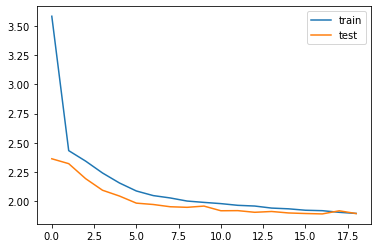

In [ ]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = x_tokenizer.index_word
target_word_index = y_tokenizer.word_index

In [ ]:
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs,
                      state_h, state_c])

# Decoder setup

# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim, ))
decoder_state_input_c = Input(shape=(latent_dim, ))
decoder_hidden_state_input = Input(shape=(max_code_len, latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2 = dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
(decoder_outputs2, state_h2, state_c2) = decoder_lstm(dec_emb2,
        initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                      decoder_state_input_h, decoder_state_input_c],
                      [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_seq):

    # Encode the input as state vectors.
    (e_out, e_h, e_c) = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1
    target_seq = np.zeros((1, 1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        (output_tokens, h, c) = decoder_model.predict([target_seq]
                + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if sampled_token != 'eostok':
            decoded_sentence += ' ' + sampled_token

        # Exit condition: either hit max length or find the stop word.
        if sampled_token == 'eostok' or len(decoded_sentence.split()) \
            >= max_summary_len - 1:
            stop_condition = True

        # Update the target sequence (of length 1)
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        (e_h, e_c) = (h, c)

    return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0 and i != target_word_index['sostok'] and i \
            != target_word_index['eostok']:
            newString = newString + reverse_target_word_index[i] + ' '

    return newString


# To convert sequence to text
def seq2text(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0:
            newString = newString + reverse_source_word_index[i] + ' '

    return newString

In [ ]:
for i in range(0, 19):
    print ('Code:', seq2text(x_train[i]))
    print ('Original summary:', seq2summary(y_train[i]))
    print ('Predicted summary:', decode_sequence(x_train[i].reshape(1,
           max_code_len)))
    print ('\n')

Code: function max level var ul this el child nodes var li els ul child nodes for var i li els length var li li els this expand li max level 
Original summary: the node param level 
Predicted summary:  the the the the


Code: function mm if done mm log name worker mm done mm true we the return value for modules lang object me get mm else log name worker done mm 
Original summary: use to 
Predicted summary:  the the the the


Code: function get next page url response const link response headers get link if link return null const next link link split filter s index of next if next link return null return next link split slice 
Original summary: the next page url from api 
Predicted summary:  the the the the


Code: function state on defined const on error err this failed with err this transition failed const on defined this transition state on defined this channel define then on defined on error 
Original summary: private of 
Predicted summary:  the the the the


Code: function if this i